In [34]:
# Importing Libraries

import pandas as pd
import healpy as hp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from astropy.io import fits
from desiutil.plots import plot_sky_binned, plot_healpix_map

from models.deep_set.set_dataloader import CCD

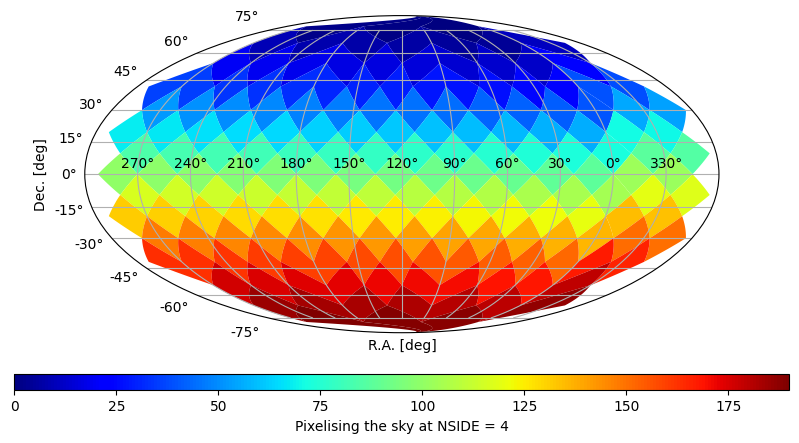

In [29]:
nside = 4
npix = hp.nside2npix(nside)
nest = False
#data = np.random.uniform(size=hp.nside2npix(nside))
data = np.arange(npix)

ax = plot_healpix_map(data, nest, label='Pixelising the sky at NSIDE = 4', galactic_plane_color=None,
                      ecliptic_plane_color=None, cmap='jet')
plt.savefig(f"report_fig/healpy_NSIDE_4.png", bbox_inches='tight', format='png', dpi=800)


In [2]:
# Defining important metrics and functions

# Setting NSIDE values
NSIDE = 256
NPIX = hp.nside2npix(NSIDE)


def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))

In [35]:
ccd = CCD()

ra0, dec0, ra1, dec1, ra2, dec2, ra3, dec3 = ccd.get_boundaries()

6


In [ ]:
df = pd.read_csv('../../bricks_data/south.csv')
df.head()

df_sum = df
df_sum['gal_sum'] = df.lrg + df.elg + df.qso
df_sum['ra'], df_sum['dec'] = hp.pix2ang(NSIDE, df_sum.pixel_id, lonlat=True)

df_sum.nsmallest(620, columns=['gal_sum', 'exposures'], keep='all')


In [ ]:
df_objects = pd.read_csv('../../bricks_data/galaxy_catalogue_south.csv',
                         dtype={'BrickID': 'int32', 'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8'})


In [36]:
with open('../../bricks_data/pixel2ccd_256.pickle', 'rb') as f:
    pixel2ccd_dict = pickle.load(f)
    f.close()

In [ ]:
# Example pixel that is half filled despite CCDs:
large_pixel = 452732

df_LRG = df_objects[df_objects["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

df_ELG = df_objects[df_objects["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

df_QSO = df_objects[df_objects["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)



In [ ]:
LRG_in_sample_pixel = (LRG_pixel_indices == large_pixel)
LRG_ra_sample_pixel = ra_LRG[LRG_in_sample_pixel]
LRG_dec_sample_pixel = dec_LRG[LRG_in_sample_pixel]

ELG_in_sample_pixel = (ELG_pixel_indices == large_pixel)
ELG_ra_sample_pixel = ra_ELG[ELG_in_sample_pixel]
ELG_dec_sample_pixel = dec_ELG[ELG_in_sample_pixel]

QSO_in_sample_pixel = (QSO_pixel_indices == large_pixel)
QSO_ra_sample_pixel = ra_QSO[QSO_in_sample_pixel]
QSO_dec_sample_pixel = dec_QSO[QSO_in_sample_pixel]


#Plotting an individual pixel


Number of CCDs in the given pixel:  106


(223.24629313343883, 224.3108785175712, -9.02133220255841, -8.334581431416957)

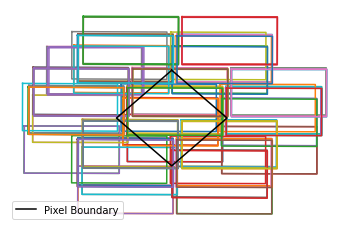

In [40]:
large_pixel = 452732

ccds_per_pixel = pixel2ccd_dict[large_pixel]

print("Number of CCDs in the given pixel: ", len(ccds_per_pixel))
for ccd in ccds_per_pixel:
    #coord = [[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]
    xs = [ra0[ccd], ra1[ccd], ra2[ccd], ra3[ccd], ra0[ccd]]
    ys = [dec0[ccd], dec1[ccd], dec2[ccd], dec3[ccd], dec0[ccd]]
    plt.plot(xs, ys)

pixel_boundary = hp.boundaries(nside=NSIDE, pix=large_pixel, step=1)
pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(), lonlat=True)
pixel_boundary_raDec = list(pixel_boundary_raDec)
pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0], pixel_boundary_raDec[0][0])
pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1], pixel_boundary_raDec[1][0])

plt.plot(pixel_boundary_raDec[0], pixel_boundary_raDec[1], c='black', label="Pixel Boundary")
plt.legend()
plt.axis('off')

In [ ]:
for i, ccd in enumerate(ccds_per_pixel):
    #coord = [[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]
    xs = [ra0[ccd], ra1[ccd], ra2[ccd], ra3[ccd], ra0[ccd]]
    ys = [dec0[ccd], dec1[ccd], dec2[ccd], dec3[ccd], dec0[ccd]]
    if i == 0:
        plt.plot(xs, ys, "c:", label='CCD Boundaries')
        continue
    plt.plot(xs, ys, "c:")

pixel_boundary = hp.boundaries(nside=NSIDE, pix=large_pixel, step=1)
pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(), lonlat=True)
pixel_boundary_raDec = list(pixel_boundary_raDec)
pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0], pixel_boundary_raDec[0][0])
pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1], pixel_boundary_raDec[1][0])

plt.plot(pixel_boundary_raDec[0], pixel_boundary_raDec[1], c='black', label="Pixel Boundary")

plt.scatter(LRG_ra_sample_pixel, LRG_dec_sample_pixel, c='red', marker='.', label="LRG")
plt.scatter(ELG_ra_sample_pixel, ELG_dec_sample_pixel, c='green', marker='.', label="ELG")
plt.scatter(QSO_ra_sample_pixel, QSO_dec_sample_pixel, c='blue', marker='.', label="QSO")

plt.xlabel("Right Ascension (R.A.) in deg")
plt.ylabel("Declination (Dec.) in deg")
#plt.xlim(223.35, 224.1)
#plt.ylim(-8.9, -8.4)

plt.legend()
plt.savefig(f"report_fig/pixel_high_dense_{large_pixel}.eps", bbox_inches='tight', format='eps', dpi=1200)

plt.show()

In [ ]:
print(len(LRG_ra_sample_pixel) + len(ELG_ra_sample_pixel) + len(QSO_ra_sample_pixel))

In [41]:

small_pixel = 642539

# Half filled example pixel 641441

df_LRG = df_objects[df_objects["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

df_ELG = df_objects[df_objects["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

df_QSO = df_objects[df_objects["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)



In [42]:
LRG_in_sample_pixel = (LRG_pixel_indices == small_pixel)
LRG_ra_sample_pixel = ra_LRG[LRG_in_sample_pixel]
LRG_dec_sample_pixel = dec_LRG[LRG_in_sample_pixel]

ELG_in_sample_pixel = (ELG_pixel_indices == small_pixel)
ELG_ra_sample_pixel = ra_ELG[ELG_in_sample_pixel]
ELG_dec_sample_pixel = dec_ELG[ELG_in_sample_pixel]

QSO_in_sample_pixel = (QSO_pixel_indices == small_pixel)
QSO_ra_sample_pixel = ra_QSO[QSO_in_sample_pixel]
QSO_dec_sample_pixel = dec_QSO[QSO_in_sample_pixel]


#Plotting an individual pixel


Number of CCDs in the given pixel:  14


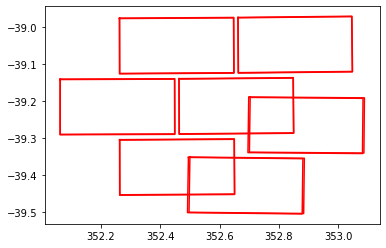

In [43]:
ccds_per_pixel = pixel2ccd_dict[small_pixel]

print("Number of CCDs in the given pixel: ", len(ccds_per_pixel))
for ccd in ccds_per_pixel:
    #coord = [[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]
    xs = [ra0[ccd], ra1[ccd], ra2[ccd], ra3[ccd], ra0[ccd]]
    ys = [dec0[ccd], dec1[ccd], dec2[ccd], dec3[ccd], dec0[ccd]]
    plt.plot(xs, ys, "r")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


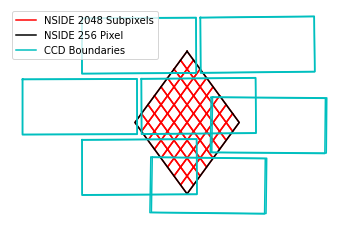

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


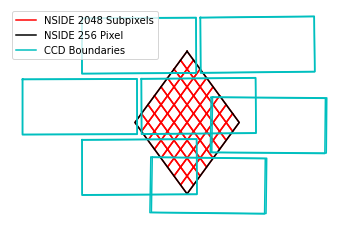

In [56]:
with open('../../bricks_data/pixel2subpixel_256_2048.pickle', 'rb') as f:
    pixel2subpixel_dict = pickle.load(f)
    f.close()

#Plotting Pixel 2 SubPixel Mapping

subpixels = pixel2subpixel_dict[small_pixel]

#Plot Subpixels
for i, subpix in enumerate(subpixels):
    pixel_boundary = hp.boundaries(nside=2048, pix=subpix, step=1)
    pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(), lonlat=True)
    pixel_boundary_raDec = list(pixel_boundary_raDec)
    pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0], pixel_boundary_raDec[0][0])
    pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1], pixel_boundary_raDec[1][0])
    if i == 0:
        plt.plot(pixel_boundary_raDec[0], pixel_boundary_raDec[1], c='red', label="NSIDE 2048 Subpixels")
        continue
    plt.plot(pixel_boundary_raDec[0], pixel_boundary_raDec[1], c='red')

pixel_boundary = hp.boundaries(nside=NSIDE, pix=small_pixel, step=1)
pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(), lonlat=True)
pixel_boundary_raDec = list(pixel_boundary_raDec)
pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0], pixel_boundary_raDec[0][0])
pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1], pixel_boundary_raDec[1][0])

plt.plot(pixel_boundary_raDec[0], pixel_boundary_raDec[1], c='black', label="NSIDE 256 Pixel")

for i, ccd in enumerate(ccds_per_pixel):
    #coord = [[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]
    xs = [ra0[ccd], ra1[ccd], ra2[ccd], ra3[ccd], ra0[ccd]]
    ys = [dec0[ccd], dec1[ccd], dec2[ccd], dec3[ccd], dec0[ccd]]
    if i == 0:
        plt.plot(xs, ys, "c", label='CCD Boundaries')
        continue
    plt.plot(xs, ys, "c")

"""s = [ra0[ccds_per_pixel],ra1[ccds_per_pixel], ra2[ccds_per_pixel], ra3[ccds_per_pixel],ra0[ccds_per_pixel] ]
ys = [dec0[ccds_per_pixel],dec1[ccds_per_pixel], dec2[ccds_per_pixel], dec3[ccds_per_pixel],dec0[ccds_per_pixel]]
plt.plot(xs,ys, "y", label='CCD Boundaries')"""

"""plt.scatter(LRG_ra_sample_pixel, LRG_dec_sample_pixel, c='red', marker='.', label="LRG")
plt.scatter(ELG_ra_sample_pixel, ELG_dec_sample_pixel, c='green', marker='.', label="ELG")
plt.scatter(QSO_ra_sample_pixel, QSO_dec_sample_pixel, c='blue', marker='.', label="QSO")"""

plt.xlabel("Right Ascension (R.A.) in deg")
plt.ylabel("Declination (Dec.) in deg")
plt.axis('off')
plt.legend()
plt.savefig(f"report_fig/ccd_subpixel.eps", bbox_inches='tight', format='eps', dpi=1200)

plt.show()

In [ ]:
print(len(LRG_ra_sample_pixel) + len(ELG_ra_sample_pixel) + len(QSO_ra_sample_pixel))

In [3]:
df_north = pd.read_csv('../../bricks_data/galaxy_catalogue_north.csv',
                       dtype={'BrickID': 'int32', 'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8'})




In [4]:
df_south = pd.read_csv('../../bricks_data/galaxy_catalogue_south.csv',
                       dtype={'BrickID': 'int32', 'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8'})


In [5]:
# exploring the overlap:

intersection = pd.Series(list(set(df_north.BrickID) & set(df_south.BrickID)))
print(len(intersection))

10896


In [6]:
print(len(df_north.BrickID.unique()))
print(len(df_south.BrickID.unique()))
print(len(df_north.BrickID.unique()) + len(df_south.BrickID.unique()))

89085
248966
338051


In [7]:
df = pd.concat((df_south, df_north), axis=0)


In [8]:
df_intersect = df[~(df['BrickID'].isin(intersection))]

In [9]:
print(len(df))
print(len(df_intersect))

119022287
113223027


In [10]:
print(df.shape)
duplicates_removed = df_intersect.drop_duplicates()

print(duplicates_removed.shape)

(119022287, 6)
(113219272, 6)


In [11]:
df = duplicates_removed

print(len(df.BrickID.unique()))

316259


In [12]:
print(df.isna().sum())

BrickID         0
RA         143609
DEC        143609
LRG             0
ELG             0
QSO             0
dtype: int64


In [13]:
# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_objects = df.dropna(axis=0, inplace=False, how='any')

print(len(df_objects.BrickID.unique()))
print(len(df_objects))

310072
113075663


In [14]:
df_objects.head()

,BrickID,RA,DEC,LRG,ELG,QSO
0,387694,350.870568,9.868695,1,0,0
1,387694,350.871680,9.637755,0,1,0
2,387694,350.872142,9.694869,0,0,1
3,387694,350.872631,9.724626,0,0,1
4,387694,350.873243,9.683394,0,1,0


### 2. Get Galaxy Count per Healpy Pixel


In [15]:
# LRG

df_LRG = df_objects[df_objects["LRG"] == 1]
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)

ra_LRG = df_LRG["RA"].to_numpy(copy=True)

theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

print(unique)

mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)
df_lrg.head()

Number of LRGs in Sample: 12571199
[  1558   1560   1561 ... 757955 758427 758428]
Mean LRGs per Pixel: 33.668195026581145


,pixel_id,lrg
0,1558,2
1,1560,1
2,1561,3
3,1562,1
4,1564,2


In [17]:
# elg

df_ELG = df_objects[df_objects["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)

dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

print("Number of ELGs in Sample:", len(ra_ELG))

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)

print(unique)

mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)
# Calculating Densities for every block
#density_ELG = (counts / mean_ELG) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)

print(df_elg.head())

Number of ELGs in Sample: 46936467
[  1558   1559   1560 ... 758428 758429 758430]
Mean ELGs per Pixel: 125.39899331279706
[[  1558      6]
 [  1559      3]
 [  1560      7]
 ...
 [758428     12]
 [758429      4]
 [758430      6]]
   pixel_id  elg
0      1558    6
1      1559    3
2      1560    7
3      1561    4
4      1562    5


In [18]:
df_QSO = df_objects[df_objects["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

print("Number of QSOs in Sample:", len(ra_QSO))

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)

print(unique)

mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)

print(df_qso.head())

Number of QSOs in Sample: 58986911
[  1558   1559   1560 ... 758428 758429 758430]
Mean QSOs per Pixel: 157.55850590708397
[[  1558      9]
 [  1559      5]
 [  1560      8]
 ...
 [758428      6]
 [758429      6]
 [758430      4]]
   pixel_id  qso
0      1558    9
1      1559    5
2      1560    8
3      1561    6
4      1562    6


In [19]:
df = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df = pd.merge(df, df_qso, how='outer', on='pixel_id')
print(df.isna().sum())
print(df_lrg.shape, df_elg.shape, df_qso.shape, df.shape)

pixel_id       0
lrg         1183
elg          271
qso          187
dtype: int64
(373385, 2) (374297, 2) (374381, 2) (374568, 4)


In [20]:
# Dropping all pixels where I do not have counts for all 3 types of galaxies
df.dropna(axis=0, inplace=True)
print(df.isna().sum())
print(df.shape)

pixel_id    0
lrg         0
elg         0
qso         0
dtype: int64
(373275, 4)


### 3. Plotting Galaxy Densities


Using healpix map with NSIDE=64 and pixel area 0.839 sq.deg.


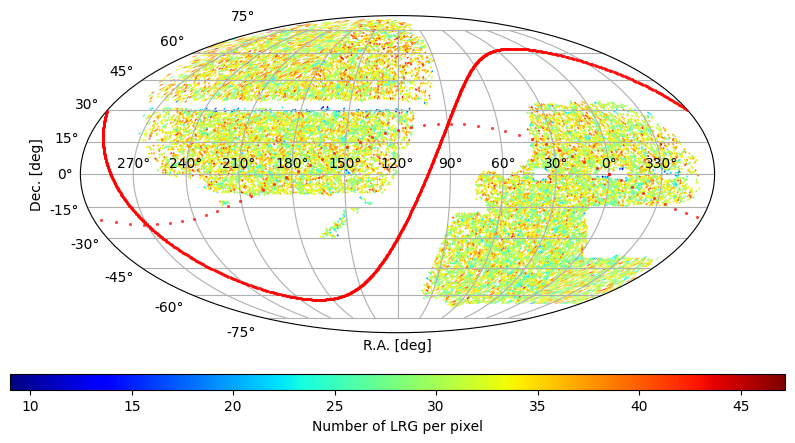

In [30]:
df_plot = df[df.lrg < 60]
m_LRG = np.zeros(NPIX)

ra, dec = hp.pix2ang(NSIDE, range(NPIX), lonlat=True)
m_LRG[df_plot.pixel_id.to_numpy()] = df_plot.lrg.to_numpy()
m_LRG = m_LRG.astype(float)
mask = (m_LRG == 0.0)
m_LRG[mask] = np.nan

ax = plot_sky_binned(ra, dec, data=m_LRG, cmap='jet', label='Number of LRG per pixel', plot_type='healpix',
                     verbose=True, max_bin_area=1.5)

plt.savefig(f"report_fig/lrg_dense.png", bbox_inches='tight', format='png', dpi=800)

Using healpix map with NSIDE=64 and pixel area 0.839 sq.deg.


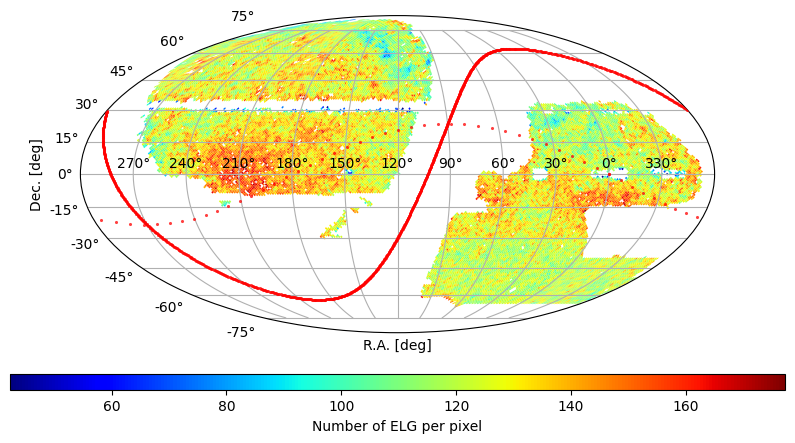

In [31]:
df_plot = df[df.elg < 205]

m_ELG = np.zeros(NPIX)

ra, dec = hp.pix2ang(NSIDE, range(NPIX), lonlat=True)
m_ELG[df_plot.pixel_id.to_numpy()] = df_plot.elg.to_numpy()
m_ELG = m_ELG.astype(float)
mask = (m_ELG == 0.0)
m_ELG[mask] = np.nan

ax = plot_sky_binned(ra, dec, data=m_ELG, cmap='jet', label='Number of ELG per pixel', plot_type='healpix',
                     verbose=True, max_bin_area=1.5)
plt.savefig(f"report_fig/elg_dense.png", bbox_inches='tight', format='png', dpi=800)


Using healpix map with NSIDE=64 and pixel area 0.839 sq.deg.


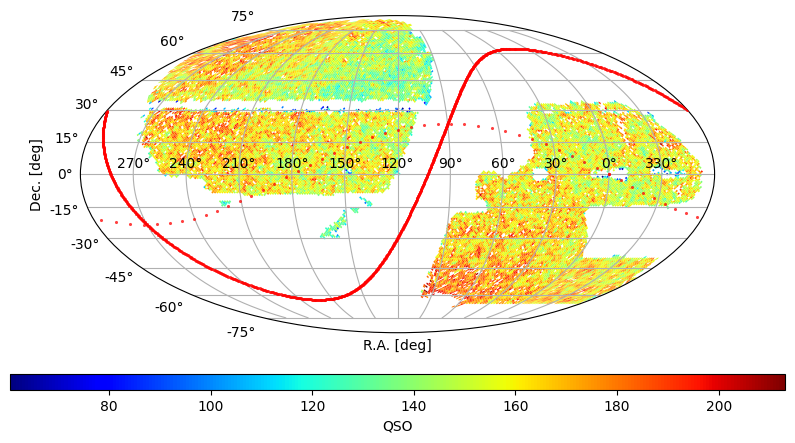

In [32]:
df_plot = df[df.qso < 245]
m_QSO = np.zeros(NPIX)

ra, dec = hp.pix2ang(NSIDE, range(NPIX), lonlat=True)
m_QSO[df_plot.pixel_id.to_numpy()] = df_plot.qso.to_numpy()
m_QSO = m_QSO.astype(float)
mask = (m_QSO == 0.0)
m_QSO[mask] = np.nan

ax = plot_sky_binned(ra, dec, data=m_QSO, cmap='jet', label='QSO', plot_type='healpix', verbose=True, max_bin_area=1.5)

plt.savefig(f"report_fig/qso_dense.png", bbox_inches='tight', format='png', dpi=800)

In [90]:


df_a = pd.read_csv('../../bricks_data/north.csv')
df_a['area'] = 1
df_b = pd.read_csv('../../bricks_data/north_test.csv')
df_b['area'] = 1
df_c = pd.read_csv('../../bricks_data/south.csv')
df_c['area'] = 2
df_d = pd.read_csv('../../bricks_data/south_test.csv')
df_d['area'] = 2

df_e = pd.read_csv('../../bricks_data/des.csv')
df_e['area'] = 3

df_f = pd.read_csv('../../bricks_data/des_test.csv')
df_f['area'] = 3


In [91]:
df_a.head()

,pixel_id,lrg,elg,qso,exposures,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,...,exptime_g,exptime_r,exptime_z,meansky_g,meansky_r,meansky_z,seeing_g,seeing_r,seeing_z,area
0,62102,30,137,169,0.230769,0.205021,0.078533,0.175817,0.705554,0.689368,...,0.335234,0.307320,0.595147,0.021994,0.009516,0.035802,0.158750,0.162669,0.082794,1
1,47512,39,109,214,0.209790,0.104603,0.043074,0.176816,0.834326,0.550439,...,0.266912,0.416220,0.463166,0.014959,0.028309,0.010970,0.093727,0.230239,0.090125,1
2,138135,36,125,173,0.230769,0.087866,0.042296,0.054642,0.776730,0.610723,...,0.305215,0.279268,0.342520,0.015843,0.017364,0.007353,0.152306,0.149229,0.078914,1
3,34254,58,71,125,0.223776,0.138075,0.288703,0.339578,0.853181,0.692403,...,0.384357,0.435739,0.562761,0.015343,0.011643,0.011854,0.163241,0.182134,0.075823,1
4,92710,30,120,174,0.265734,0.799163,0.383586,0.178532,0.799223,0.167260,...,0.452397,0.484762,0.559712,0.021860,0.335266,0.012966,0.102319,0.130691,0.117777,1


In [92]:
df = df = pd.concat((df_a, df_b, df_c, df_d, df_e, df_f), axis=0)

df.head()

df = df.drop_duplicates()

In [93]:
df.columns

Index(['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV',
       'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z',
       'seeing_g', 'seeing_r', 'seeing_z', 'area'],
      dtype='object')

In [94]:
col = ['airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z',
       'seeing_g', 'seeing_r', 'seeing_z']
print(len(col))

14


In [95]:
df['ra'], df['dec'] = hp.pix2ang(NSIDE, df.pixel_id, lonlat=True)

#ax = plot_sky_binned(df.ra,df.dec, data=df.stellar, cmap='jet',label='Stellar Density', plot_type='grid', verbose=True,max_bin_area=.2)


df.head()

,pixel_id,lrg,elg,qso,exposures,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,...,exptime_z,meansky_g,meansky_r,meansky_z,seeing_g,seeing_r,seeing_z,area,ra,dec
0,62102,30,137,169,0.230769,0.205021,0.078533,0.175817,0.705554,0.689368,...,0.595147,0.021994,0.009516,0.035802,0.158750,0.162669,0.082794,1,256.960227,57.399524
1,47512,39,109,214,0.209790,0.104603,0.043074,0.176816,0.834326,0.550439,...,0.463166,0.014959,0.028309,0.010970,0.093727,0.230239,0.090125,1,227.045455,61.566964
2,138135,36,125,173,0.230769,0.087866,0.042296,0.054642,0.776730,0.610723,...,0.342520,0.015843,0.017364,0.007353,0.152306,0.149229,0.078914,1,143.085938,40.423899
3,34254,58,71,125,0.223776,0.138075,0.288703,0.339578,0.853181,0.692403,...,0.562761,0.015343,0.011643,0.011854,0.163241,0.182134,0.075823,1,133.625954,65.883232
4,92710,30,120,174,0.265734,0.799163,0.383586,0.178532,0.799223,0.167260,...,0.559712,0.021860,0.335266,0.012966,0.102319,0.130691,0.117777,1,289.046512,49.896984


<ipython-input-114-90a997945cda>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


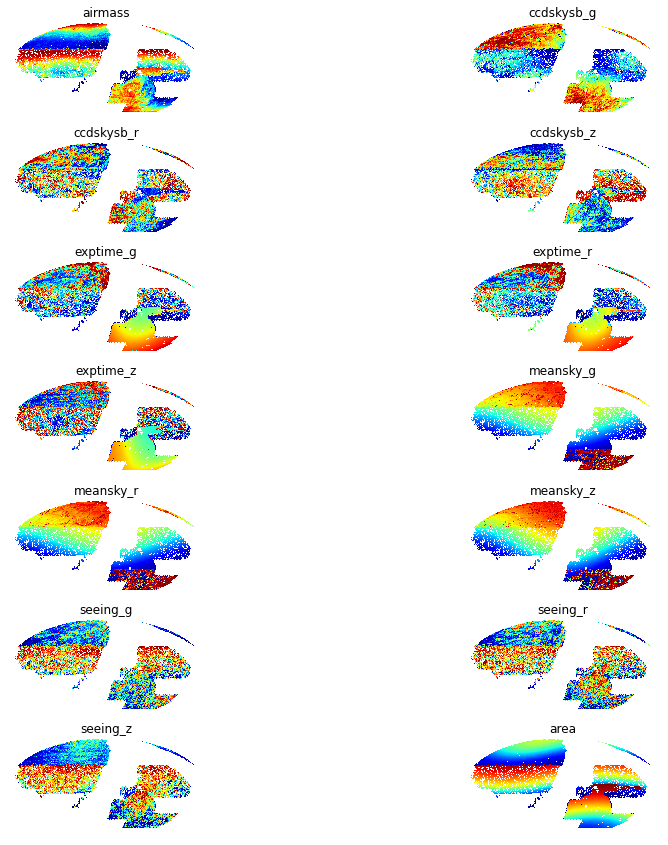

In [114]:
nrows = 7
ncols = 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

#fig = plt.figure()
p = 0
for ax in ax.flatten():
    elem = col[p]

    m = np.zeros(NPIX)

    m[df.pixel_id.to_numpy()] = df[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan

    plt.axes(ax)
    hp.mollview(m, title=elem, norm='hist', fig=fig, sub=(nrows, ncols, p + 1), cbar=False, cmap="jet", notext=False,
                rot=(100, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    p += 1

fig.show()
#plt.savefig(f"report_fig/stellar_dens.png", bbox_inches='tight', format='png', dpi=500)